# Prep Notebook 4
## Regressing Wine Sales

This notebook has a few exercises that can serve as a primer for what to expect in the `Problem Session 4` notebook. These exercises will touch upon the basic python, `pandas`, `numpy`, `matplotlib` and some supervised learning basic techniques that you may want a refresher on prior to starting `Problem Session 4`.

##### 1. Load in `carseats.csv`

Load in `carseats.csv` using `pandas`.

In [1]:
import pandas as pd

In [2]:
carseats = pd.read_csv("../../Data/carseats.csv")

##### 2. Train test split

Make a train test split of `carseats`.

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
car_train, car_test = train_test_split(carseats, 
                                        shuffle = True,
                                        random_state = 22,
                                        test_size = .2)

In [5]:
car_train.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
271,4.55,111,56,0,504,110,Medium,62,16,Yes,No
98,12.49,122,77,24,382,127,Good,36,16,No,Yes
329,11.27,100,54,9,433,89,Good,45,12,Yes,Yes
82,11.62,151,83,4,325,139,Good,28,17,Yes,Yes
15,8.71,149,95,5,400,144,Medium,76,18,No,No


##### 3. EDA

Use `seaborn`'s `pairplot` to make scatter plots of `Sales` against `Price`, `Population` and `Advertising`. <i>Hint: use they `y_vars` and `x_vars` arguements</i>.

In [6]:
import matplotlib.pyplot as plt
from seaborn import set_style, pairplot

set_style("whitegrid")

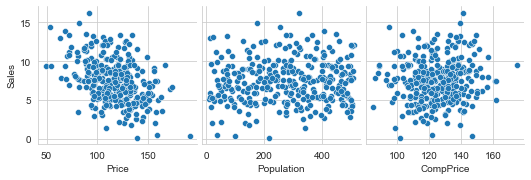

In [7]:
pairplot(car_train,
            y_vars = ['Sales'],
            x_vars = ['Price', 'Population', 'CompPrice'])

plt.show()

##### 4. Fit a model

Fit the model regressing `Sales` on `CompPrice`. Find the mean squared error on the training set.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
reg = LinearRegression(copy_X = True)

reg.fit(car_train.CompPrice.values.reshape(-1,1),
           car_train.Sales.values)

mean_squared_error(car_train.Sales.values,
                      reg.predict(car_train.CompPrice.values.reshape(-1,1)))

7.657849114022049

##### 5. CV

Loop through a 5-fold cross-validation. Fit the regression model from 4. on the training sets for each split and print the MSE for the training set of that model.

In [10]:
from sklearn.model_selection import KFold

In [11]:
kfold = KFold(5,
                 random_state = 32143,
                 shuffle=True)

for train_index, test_index in kfold.split(car_train):
    car_tt = car_train.iloc[train_index]
    car_ho = car_train.iloc[test_index]
    
    reg = LinearRegression(copy_X = True)
    
    reg.fit(car_tt.CompPrice.values.reshape(-1,1),
               car_tt.Sales.values)
    
    print(mean_squared_error(car_tt.Sales.values,
                                reg.predict(car_tt.CompPrice.values.reshape(-1,1))))

7.569090410922727
8.194469579971575
7.416496996282131
7.394089132540774
7.641486658810888


--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)